In [1]:
import fastf1
import pandas as pd
from scipy import signal
import numpy as np

In [ ]:
session = fastf1.get_session(2023, "Azerbaijan Grand Prix", "R")
session.load()

In [3]:
lap = session.laps.loc[session.laps.index == 182]

In [4]:
lap

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
182,0 days 01:59:16.304000,14,0 days 00:01:45.691000,30,NaT,NaT,0 days 00:00:37.445000,0 days 00:00:42.884000,0 days 00:00:25.362000,0 days 01:58:08.058000,...,HARD,19.0,False,2,0 days 01:57:30.613000,Aston Martin,ALO,1,True,2023-04-30 11:58:32.083


In [5]:
pos_data = lap.get_pos_data()
pos_data = pos_data["X"]
pos_data /= 10

In [6]:
pos_data = pos_data.to_numpy()

In [7]:
def plot(pos_data, window_length, polyorder):
    smooth = signal.savgol_filter(pos_data, window_length=window_length, polyorder=polyorder, mode="nearest")
    smooth = pd.DataFrame(smooth)
    smooth.plot()

<Axes: >

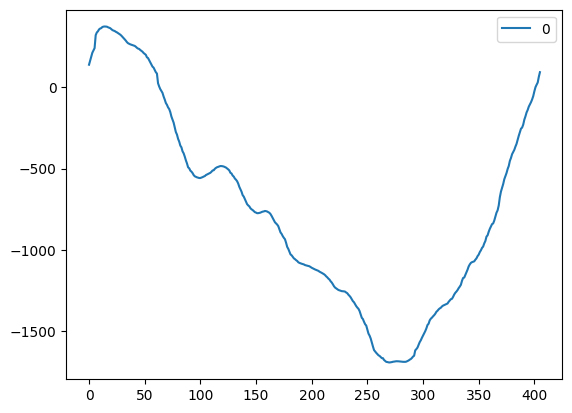

In [8]:
raw = pd.DataFrame(pos_data)
raw.plot()

<Axes: >

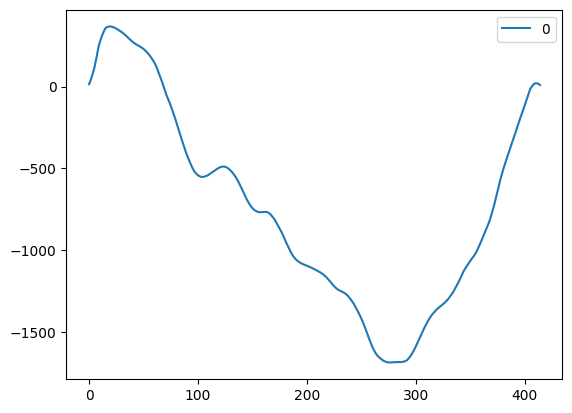

In [14]:
naiive_conv = np.convolve(pos_data, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], mode="full")
naiive_conv = pd.DataFrame(naiive_conv)
naiive_conv.plot()

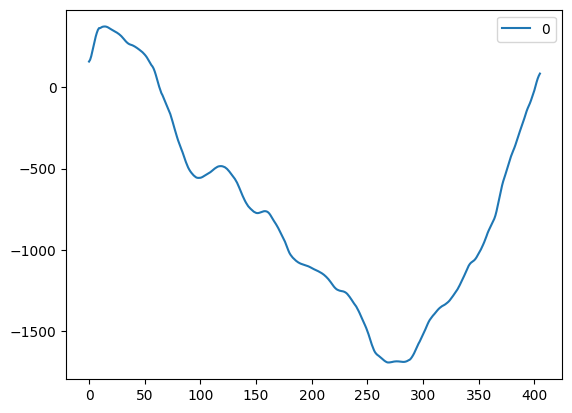

In [28]:
plot(pos_data, window_length=10, polyorder=2)

In [10]:
pd.DataFrame(pos_data)

,0
0,137.3
1,162.0
2,186.6
3,211.2
4,225.9
...,...
401,-0.7
402,14.4
403,27.7
404,62.8


In [11]:
smooth = signal.savgol_filter(pos_data, window_length=10, polyorder=2, mode="nearest")
smooth = pd.DataFrame(smooth)
smooth

,0
0,156.532500
1,167.838125
2,189.797500
3,219.648125
4,251.687500
...,...
401,5.068125
402,30.053750
403,52.070625
404,69.403125


In [12]:
signal.savgol_coeffs(window_length=10, polyorder=2)

array([-0.0875 ,  0.0375 ,  0.13125,  0.19375,  0.225  ,  0.225  ,
        0.19375,  0.13125,  0.0375 , -0.0875 ])